In [36]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.integrate import complex_ode
from numpy import gradient, squeeze, sqrt
from scipy.fftpack import fft, ifft,fftshift
from tqdm.notebook import tqdm

plt.style.use(['science','nature','notebook'])

In [ ]:
# zeta2 = 1e-7
# zeta1 = 4e-2

zeta2 = 1.0*10e-7
zeta1 = 4.0*10e-2

omega0 = 2
omegas = 0
Omega_r = 0.1

F=0.1
Mass=1

#Ns=2000000
ts = 2000

In [ ]:
def dSdt(t,S):
    x1,y1,x2,y2 = S
    return (y1, -zeta1*y1-(omega0**2)*x1 +(Omega_r**2)*x2 + (F*np.exp(-1j*omegas*t)), 
            y2, -zeta2*y2-(omega0**2)*x2 +(Omega_r**2)*x1)

x1_0 = 0
y1_0 = 0 #dx/dt
x2_0 = 0
y2_0 = 0
S_0 = (x1_0, y1_0, x2_0, y2_0)
t = np.linspace(0, ts, 10000000)
sol_ivp = solve_ivp(dSdt, t_span=(0,ts), y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-10, rtol=1e-10, t_eval=t) #DOP853

In [ ]:
plt.figure(facecolor='w')
plt.plot(sol_ivp.t, sol_ivp.y[0], label='x1')
plt.plot(sol_ivp.t, sol_ivp.y[1], label='dx1')
plt.plot(sol_ivp.t, sol_ivp.y[2], label='x2')
plt.plot(sol_ivp.t, sol_ivp.y[3], label='dx2')
plt.ylabel('$x(t)$')
plt.xlabel('$t$')
plt.title('y solve_ivp solver')
#plt.legend()
plt.tight_layout()

In [ ]:
# X0 = fft(sol_ivp.y[0])
# X1 = fft(sol_ivp.y[1])
# X2 = fft(sol_ivp.y[2])
# X3 = fft(sol_ivp.y[3])

##0
X0 = fft(sol_ivp.y[0,:])
N = len(X0)
n = np.arange(N)
#sr = 1000
#T = N/sr
T = ts
freq = 2*np.pi*n/T

plt.figure(figsize=(10,2))
plt.subplot(121)

plt.plot(freq-omega0, np.abs(X0), 'b')
 
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0.26,0.37)
plt.xlim(-omega0,omega0)

plt.subplot(122)
plt.plot(sol_ivp.t, ifft(X0), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

##1
X1 = fft(sol_ivp.y[1,:])
N = len(X1)
n = np.arange(N)
#sr = 1000
#T = N/sr
T = ts
freq = 2*np.pi*n/T

plt.figure(figsize=(10,2))
plt.subplot(121)

plt.plot((freq-omega0), np.abs(X1), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(-omega0,omega0)

plt.subplot(122)
plt.plot(sol_ivp.t, ifft(X1), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

##2
X2 = fft(sol_ivp.y[2,:])
N = len(X2)
n = np.arange(N)
#sr = 1000
#T = N/sr
T = ts
freq = 2*np.pi*n/T 

plt.figure(figsize=(10,2))
plt.subplot(121)

plt.plot(freq-omega0, np.abs(X2), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(-omega0,omega0)

plt.subplot(122)
plt.plot(sol_ivp.t, ifft(X2), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

##3
X3 = fft(sol_ivp.y[3,:])
N = len(X3)
n = np.arange(N)
#sr = 1000
#T = N/sr
T = ts
freq = 2*np.pi*n/T 

plt.figure(figsize=(10,2))
plt.subplot(121)

plt.plot(freq-omega0, np.abs(X3), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(0.26,0.37)
plt.xlim(-omega0,omega0)

plt.subplot(122)
plt.plot(sol_ivp.t, ifft(X3), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()



In [52]:
#all
#x.clear()
#y.clear()
x=[]
y=[]
plt.figure(figsize=(10,2))

xrange = np.arange(0.1,0.2,1)
for Omega_r in tqdm(xrange, desc='Progress'):
    #EIT constant
    zeta2 = 1.0*10e-7
    zeta1 = 4.0*10e-2
    omega0 = 2
    omegas = 0
    #Omega_r = 0.3
    F=0.1
    Mass=1
    ts = 8000

    def dSdt(t,S):
        x1,y1,x2,y2 = S
        return (y1, -zeta1*y1-(omega0**2)*x1 +(Omega_r**2)*x2 + (F*np.exp(-1j*omegas*t)), 
                y2, -zeta2*y2-(omega0**2)*x2 +(Omega_r**2)*x1)

    x1_0 = 0
    y1_0 = 0 #dx/dt
    x2_0 = 0
    y2_0 = 0
    apex = 100
    S_0 = (x1_0, y1_0, x2_0, y2_0)
    t = np.linspace(0, ts, 10000*apex)
    #solve ode
    sol_ivp = solve_ivp(dSdt, t_span=(0,ts) ,y0=np.array(S_0, dtype='complex_'), method='DOP853', atol=1e-12, rtol=1e-12, t_eval=t) #DOP853

    ##1
    X1 = fft(np.real(sol_ivp.y[1,:]))
    N = len(X1)
    n = np.arange(N)
    #sr = 1000
    #T = N/sr
    T = ts
    freq = 2*np.pi*n/T 

    # plt.plot(freq-omega0, np.abs(X1))
    # plt.xlabel('Freq (Hz)')
    # plt.ylabel('FFT Amplitude |X(freq)|')
    # plt.xlim(-omega0,omega0)

    x.append(freq-omega0)
    y.append(sol_ivp.y[1,:])
    




Progress:   0%|          | 0/1 [00:00<?, ?it/s]

<Figure size 720x144 with 0 Axes>

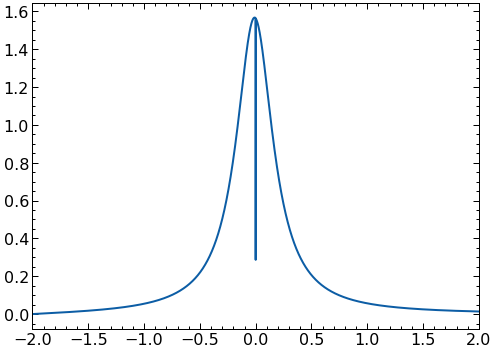

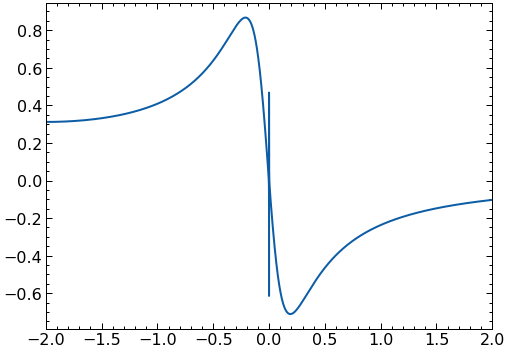

In [55]:
plt.figure()
for n in np.arange(len(x)):
    plt.plot(x[n], np.abs(np.imag(fft(y[n])))/1)
    plt.xlim(-2,2)

plt.figure()
for n in np.arange(len(x)):
    plt.plot(x[n], np.real(fft(y[n]))/1)
    plt.xlim(-2,2)

(-2.0, 2.0)

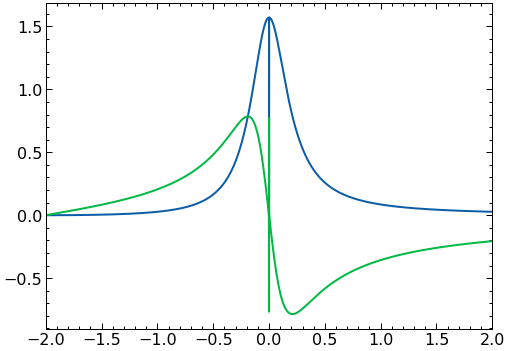

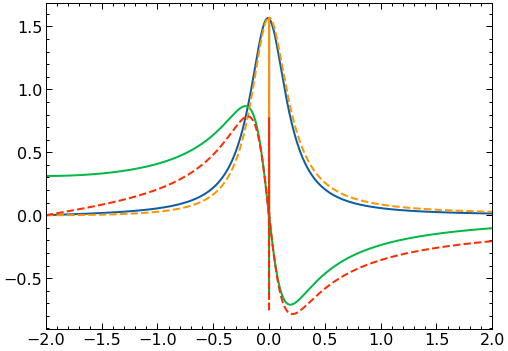

In [56]:
hz = np.linspace(-10,10,10000*apex)
m=0

F = 0.1
w = 2
b = 1.0*10e-7
a = 4.0*10e-2
c1=xrange[m]

def f(xx,c):
    return (-2*(np.pi)*1j*F*xx*(w**2-xx**2-1j*b*xx))/(((w**2-xx**2-1j*a*xx)*(w**2-xx**2-1j*b*xx))-c**4)

plt.plot(hz-w,np.real(f(hz,c1)), label='Real part')
plt.plot(hz-w,-np.imag(f(hz,c1)), label='Imag part')
plt.xlim(-2,2)


plt.figure()
plt.plot(x[m], np.abs(np.imag(fft(y[m]))))
plt.plot(x[m], np.real(fft(y[m])))

plt.plot(hz-w,np.real(f(hz,c1)), label='Real part', linestyle ='--')
plt.plot(hz-w,-np.imag(f(hz,c1)), label='Imag part', linestyle ='--')
plt.xlim(-2,2)




In [ ]:
plt.figure()
X1 = np.imag(fft(sol_ivp.y[1,:]))
N = len(X1)
n = np.arange(N)
#sr = 1000
#T = N/sr
T = ts
freq = 2*np.pi*n/T 

plt.plot(freq-omega0, np.abs(X1))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(-0.1,0.1)
#plt.xlim(0.26,0.37)
plt.xlim(-omega0,omega0)

plt.figure()
X1i = np.real(fft(sol_ivp.y[1,:]))
N = len(X1i)
n = np.arange(N)
#sr = 1000
#T = N/sr
T = ts
freq = 2*np.pi*n/T 

plt.plot(freq-omega0, (X1i))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
#plt.xlim(-0.1,0.1)
#plt.xlim(0.26,0.37)
plt.xlim(-omega0,omega0)



In [ ]:
fft(sol_ivp.y[1,:])

In [ ]:
#all
plt.figure(figsize=(10,2))
for Omega_r in np.arange (0.3,0.5,0.01):
    # zeta1 = 1e-7
    # zeta2 = 1e-1
    # omega0 = 3.5
    # omegas = 0
    # #Omega_r = 1
    # F=0.01
    # Mass=1
    # ts = 9999

    zeta2 = 1e-9
    zeta1 = 4e-2
    omega0 = 3.15
    omegas = 0
    #Omega_r = 0.35
    F=0.01
    Mass=1
    ts = 2500

    def dSdt(t,S):
        x1,y1,x2,y2 = S
        return (y1, -zeta1*y1-(omega0**2)*x1 +(Omega_r**2)*x2 + (F*np.exp(-1j*omegas*t)), 
                y2, -zeta2*y2-(omega0**2)*x2 +(Omega_r**2)*x1)

    x1_0 = 0
    y1_0 = 0 #dx/dt
    x2_0 = 0
    y2_0 = 0
    S_0 = (x1_0, y1_0, x2_0, y2_0)
    t = np.linspace(0, ts, 1000000)
    sol_ivp = solve_ivp(dSdt, t_span=(0,ts), y0=S_0, method='DOP853', atol=1e-12, rtol=1e-12, t_eval=t) #DOP853

    ##1
    X1 = fft(sol_ivp.y[1,:])
    N = len(X1)
    n = np.arange(N)
    #sr = 1000
    #T = N/sr
    T = ts
    freq = n/T 

    plt.plot(freq, np.abs(X1))
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    #plt.xlim(0.552,0.562)
    plt.xlim(0.475,0.525)

    # plt.subplot(122)
    # plt.plot(sol_ivp.t, ifft(X1), 'r')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')
    # plt.tight_layout()


In [ ]:
#all
plt.figure(figsize=(10,2))
for Omega_r in np.arange (0.3,0.5,0.01):
    # zeta1 = 1e-7
    # zeta2 = 1e-1
    # omega0 = 3.5
    # omegas = 0
    # #Omega_r = 1
    # F=0.01
    # Mass=1
    # ts = 9999

    zeta1 = 1e-7
    zeta2 = 4e-2
    omega0 = 3.15
    omegas = 0
    #Omega_r = 0.35
    F=0.01
    Mass=1
    ts = 2500

    def dSdt(t,S):
        x1,y1,x2,y2 = S
        return (y1, -zeta1*y1-(omega0**2)*x1 +(Omega_r**2)*x2 + (F*np.exp(-1j*omegas*t)), 
                y2, -zeta2*y2-(omega0**2)*x2 +(Omega_r**2)*x1)

    x1_0 = 0
    y1_0 = 0 #dx/dt
    x2_0 = 0
    y2_0 = 0
    S_0 = (x1_0, y1_0, x2_0, y2_0)
    t = np.linspace(0, ts, 1000000)
    sol_ivp = solve_ivp(dSdt, t_span=(0,ts), y0=S_0, method='DOP853', atol=1e-12, rtol=1e-12, t_eval=t) #DOP853

    ##1
    X1 = fft(sol_ivp.y[1,:])
    N = len(X1)
    n = np.arange(N)
    #sr = 1000
    #T = N/sr
    T = ts
    freq = n/T 

    plt.plot(freq, np.abs(X1))
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    #plt.xlim(0.552,0.562)
    plt.xlim(0.475,0.525)

    # plt.subplot(122)
    # plt.plot(sol_ivp.t, ifft(X1), 'r')
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')
    # plt.tight_layout()
